In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# OBS:
Fonte dos dados: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Mas após analisar e achar estranho o fato de pessoas com maior colesterol e pressão estarem no output 0 procurei mais sobre e encontrei uma melhor descrição em: https://archive.ics.uci.edu/ml/datasets/Heart+Disease, e aparentemente output = 0 indica < 50% diameter narrowing que induz a uma maior chance de ter infartos e avcs

# About this dataset
Age : idade do paciente

Sex : genero do paciente

exang: angina(dor no peito) induzida por exercício(1 = sim; 0 = não)

caa: number of major vessels (0-3)

cp : Tipo de dor no peito

    0: angina típica
    
    1: angina atípica
    
    2: dor não anginosa
    
    3: assintomático

trtbps : pressão sanguínea em repouso (in mm Hg)

chol : cholesterol in mg/dl medido via BMI sensor

fbs : (açúcar no sangue em jejum > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

thall : Taxa de Thal

output : Value 0: < 50% diameter narrowing,
        Value 1: > 50% diameter narrowing

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
heart[heart.duplicated() == True] #Valor duplicado

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
heart[heart['age'] == 38]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [7]:
heart.drop(164, inplace=True)

In [8]:
#Porcentagem de uma maior chance de ataque cardíaco
x = heart['output'].value_counts()
print('Porcentagem de uma maior chance de ataque cardíaco: ',x[0]/x.sum()*100)

Porcentagem de uma maior chance de ataque cardíaco:  45.6953642384106


In [9]:
heart[['sex','output']].value_counts()

sex  output
1    0         114
     1          92
0    1          72
     0          24
dtype: int64

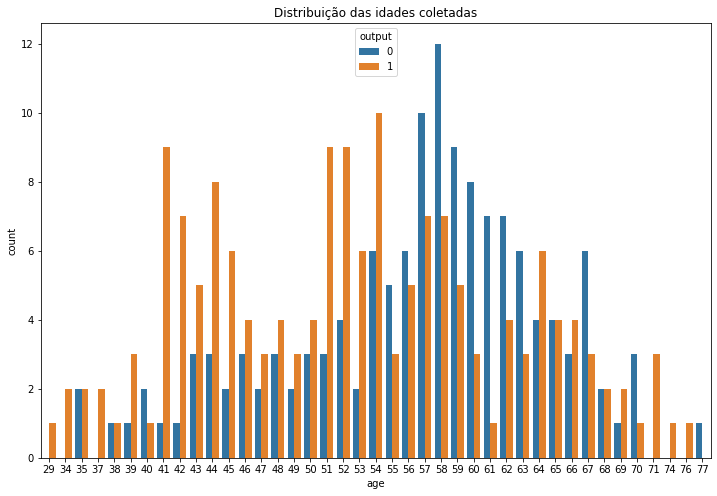

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='age', data=heart, hue='output')
plt.title('Distribuição das idades coletadas');

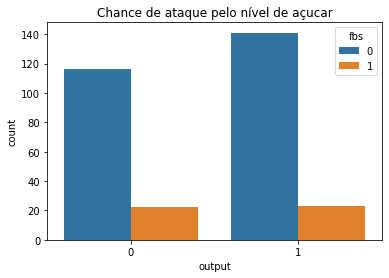

In [11]:
sns.countplot(x='output', data=heart, hue='fbs')
plt.title('Chance de ataque pelo nível de açucar');

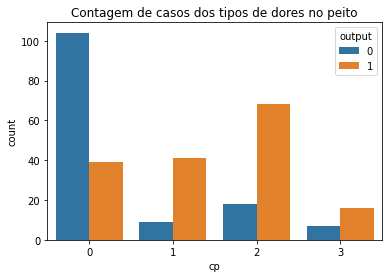

In [12]:
sns.countplot(x='cp', data=heart, hue='output')
plt.title('Contagem de casos dos tipos de dores no peito');

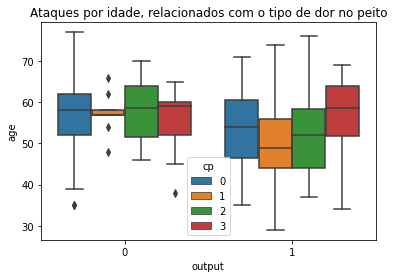

In [13]:
sns.boxplot(x='output', y='age', data=heart, hue='cp')
plt.title('Ataques por idade, relacionados com o tipo de dor no peito');

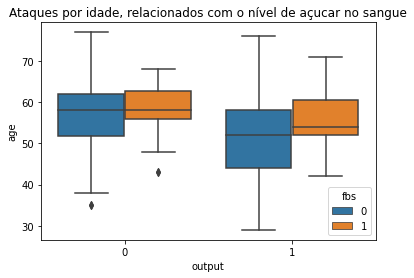

In [14]:
sns.boxplot(x='output', y='age', data=heart, hue='fbs')
plt.title('Ataques por idade, relacionados com o nível de açucar no sangue');

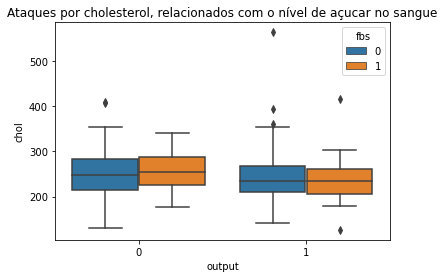

In [15]:
sns.boxplot(x='output', y='chol', data=heart, hue='fbs')
plt.title('Ataques por cholesterol, relacionados com o nível de açucar no sangue');

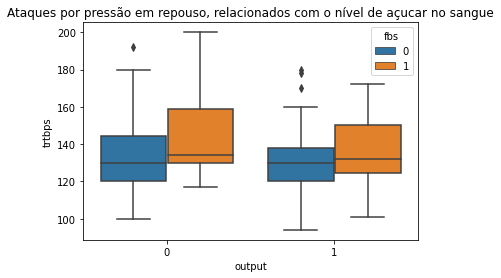

In [16]:
sns.boxplot(x='output', y='trtbps', data=heart, hue='fbs')
plt.title('Ataques por pressão em repouso, relacionados com o nível de açucar no sangue');

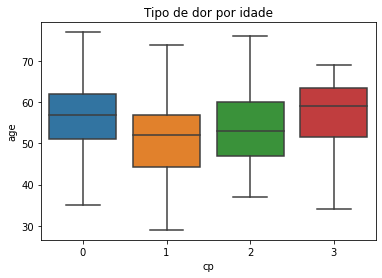

In [17]:
sns.boxplot(x='cp', y='age', data=heart)
plt.title('Tipo de dor por idade');

<AxesSubplot:>

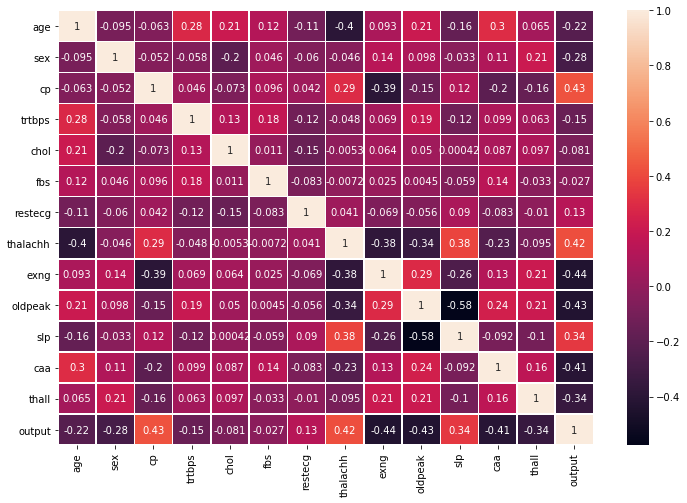

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(heart.corr(), annot=True, linewidths=.5)

# Modelos

Utilizarei 4 modelos, sendo 3 de classificação e 1 de regressão
Em casos onde queremos mapear um padrão e não um valor específico em si, os modelos de classificação são os mais adequados, nesse caso queremos classificar se, dadas as caracterisiticas, as chances de um individuo ter ataque cardíaco são altas ou baixas.

No entanto, o modelo de regressão utilizado, LogisticRegression trabalha muito bem com essa dupla de possibilidades, no caso 0 para alta chance, 1 para baixa chance, e devido a isso está sendo utilizado

In [19]:
X_treino, X_teste, y_treino, y_teste = train_test_split(heart.drop(['output'], axis=1), heart['output'], test_size=0.2,random_state=171)

In [20]:
forest_ml = RandomForestClassifier()
knn_ml = KNeighborsClassifier(5,metric='euclidean')
log_ml = LogisticRegression(max_iter=1000)
tree_ml = DecisionTreeClassifier()

In [21]:
forest_ml.fit(X_treino,y_treino)
knn_ml.fit(X_treino,y_treino)
log_ml.fit(X_treino,y_treino)
tree_ml.fit(X_treino,y_treino)

DecisionTreeClassifier()

In [22]:
forest_pred = forest_ml.predict(X_teste)
knn_pred = knn_ml.predict(X_teste)
log_pred = log_ml.predict(X_teste)
tree_pred = tree_ml.predict(X_teste)

In [23]:
print('Forest Classifier')
print(classification_report(y_teste,forest_pred))
print(confusion_matrix(y_teste,forest_pred))

Forest Classifier
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.81      0.83      0.82        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

[[25  6]
 [ 5 25]]


In [24]:
print('KNN')
print(classification_report(y_teste,knn_pred))
print(confusion_matrix(y_teste,knn_pred))

KNN
              precision    recall  f1-score   support

           0       0.95      0.58      0.72        31
           1       0.69      0.97      0.81        30

    accuracy                           0.77        61
   macro avg       0.82      0.77      0.76        61
weighted avg       0.82      0.77      0.76        61

[[18 13]
 [ 1 29]]


In [25]:
print('logistic regression')
print(classification_report(y_teste,log_pred))
print(confusion_matrix(y_teste,log_pred))

logistic regression
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.87      0.90      0.89        30

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

[[27  4]
 [ 3 27]]


In [26]:
print('Decision Tree Classifier')
print(classification_report(y_teste,tree_pred))
print(confusion_matrix(y_teste,tree_pred))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        31
           1       0.75      0.70      0.72        30

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

[[24  7]
 [ 9 21]]


# Conclusão

Os classificados como alta chande de ataque cardíaco são em grande parte mais velhos, e com maior glicose e colesterol no sangue e uma pressão sanguínea mais alta, informações já são esperadas.

Por final, em relação aos modelos, todos tiveram uma boa performance na hora de predizer uma baixa chance de ataque cardíaco, dando destaque para a LogisticRegression com precisão de 87%, e a maior acurácia. No entanto, como estamos tratando de uma doença, temos que priorizar modelos onde a precisão para o positivo é maior, afinal é melhor ser diagnosticado com a doença sem tê-la e se tratar sem necessidade do que ter a doença, não diagnostica-la e acabar tendo maiores problemas no futuro. Por isso o modelo de KNN seria a melhor escolha, pois obteve a maior precisão para o valor 0